In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("../data/weekavg_gas/Gasoline_Prices.csv")
df

,Date,New York State Average ($/gal),Albany Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal)
0,3/27/2023,3.43,3.46,3.37,3.35,3.34,3.45,3.40,3.42,3.46
1,3/20/2023,3.45,3.48,3.38,3.36,3.36,3.49,3.42,3.43,3.47
2,3/13/2023,3.46,3.49,3.39,3.36,3.36,3.52,3.42,3.44,3.48
3,3/6/2023,3.44,3.47,3.38,3.37,3.32,3.45,3.42,3.43,3.48
4,2/27/2023,3.47,3.51,3.41,3.39,3.36,3.48,3.45,3.45,3.50
...,...,...,...,...,...,...,...,...,...,...
800,11/26/2007,3.28,3.26,3.25,3.29,3.27,3.28,3.28,3.29,3.32
801,11/19/2007,3.26,3.24,3.23,3.27,3.25,3.26,3.26,3.28,3.31
802,11/12/2007,3.21,3.20,3.18,3.21,3.18,3.18,3.20,3.22,3.25
803,11/5/2007,3.10,3.09,3.08,3.09,3.06,3.07,3.09,3.10,3.12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Date                            805 non-null    object 
 1   New York State Average ($/gal)  805 non-null    float64
 2   Albany Average ($/gal)          805 non-null    float64
 3   Binghamton Average ($/gal)      805 non-null    float64
 4   Buffalo Average ($/gal)         805 non-null    float64
 5   Nassau Average ($/gal)          805 non-null    float64
 6   New York City Average ($/gal)   805 non-null    float64
 7   Rochester Average ($/gal)       805 non-null    float64
 8   Syracuse Average ($/gal)        805 non-null    float64
 9   Utica Average ($/gal)           805 non-null    float64
dtypes: float64(9), object(1)
memory usage: 63.0+ KB


In [4]:
df.describe()

,New York State Average ($/gal),Albany Average ($/gal),Binghamton Average ($/gal),Buffalo Average ($/gal),Nassau Average ($/gal),New York City Average ($/gal),Rochester Average ($/gal),Syracuse Average ($/gal),Utica Average ($/gal)
count,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,3.117689,3.048547,3.066708,3.092584,3.116112,3.198025,3.083093,3.038149,3.101019
std,0.654908,0.657624,0.655589,0.654572,0.661892,0.653524,0.658171,0.667050,0.661522
min,1.830000,1.780000,1.710000,1.850000,1.820000,1.900000,1.800000,1.760000,1.810000
25%,2.590000,2.520000,2.540000,2.560000,2.580000,2.670000,2.560000,2.480000,2.570000
50%,2.970000,2.880000,2.920000,2.960000,2.990000,3.060000,2.940000,2.910000,2.940000
75%,3.710000,3.620000,3.660000,3.700000,3.720000,3.790000,3.680000,3.620000,3.700000
max,5.030000,4.970000,4.970000,4.900000,5.030000,5.180000,4.980000,4.970000,5.000000


In [5]:
df.isna().sum()

Date                              0
New York State Average ($/gal)    0
Albany Average ($/gal)            0
Binghamton Average ($/gal)        0
Buffalo Average ($/gal)           0
Nassau Average ($/gal)            0
New York City Average ($/gal)     0
Rochester Average ($/gal)         0
Syracuse Average ($/gal)          0
Utica Average ($/gal)             0
dtype: int64

In [6]:
df.columns

Index(['Date', 'New York State Average ($/gal)', 'Albany Average ($/gal)',
       'Binghamton Average ($/gal)', 'Buffalo Average ($/gal)',
       'Nassau Average ($/gal)', 'New York City Average ($/gal)',
       'Rochester Average ($/gal)', 'Syracuse Average ($/gal)',
       'Utica Average ($/gal)'],
      dtype='object')

In [7]:
df= df[['Date', 'New York City Average ($/gal)']]
df.columns=['date', 'nyc_gasprice_avg']
df

,date,nyc_gasprice_avg
0,3/27/2023,3.45
1,3/20/2023,3.49
2,3/13/2023,3.52
3,3/6/2023,3.45
4,2/27/2023,3.48
...,...,...
800,11/26/2007,3.28
801,11/19/2007,3.26
802,11/12/2007,3.18
803,11/5/2007,3.07


In [8]:
df['date']= pd.to_datetime(df['date'])

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20340\1211396873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']= pd.to_datetime(df['date'])


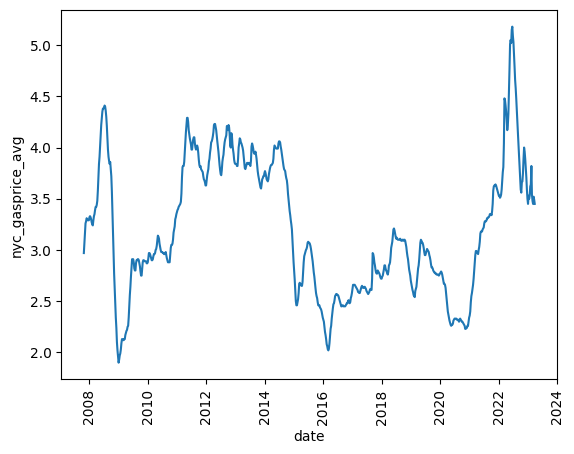

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot all the variables on the same chart
sns.lineplot(x='date', y='nyc_gasprice_avg', data=df)
# display the chart
plt.xticks(rotation=90)
plt.show()

In [10]:
df

,date,nyc_gasprice_avg
0,2023-03-27,3.45
1,2023-03-20,3.49
2,2023-03-13,3.52
3,2023-03-06,3.45
4,2023-02-27,3.48
...,...,...
800,2007-11-26,3.28
801,2007-11-19,3.26
802,2007-11-12,3.18
803,2007-11-05,3.07


In [11]:
df['date'] = pd.to_datetime(df['date'])
df= df.set_index('date')
df = df.resample('D').ffill()
df.reset_index(inplace=True)
df

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20340\3338126936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


,date,nyc_gasprice_avg
0,2007-10-29,2.97
1,2007-10-30,2.97
2,2007-10-31,2.97
3,2007-11-01,2.97
4,2007-11-02,2.97
...,...,...
5624,2023-03-23,3.49
5625,2023-03-24,3.49
5626,2023-03-25,3.49
5627,2023-03-26,3.49


In [12]:
df[df['date']>='2020-01-01']['nyc_gasprice_avg'].describe()

count    1182.000000
mean        3.258443
std         0.788078
min         2.230000
25%         2.490000
50%         3.310000
75%         3.660000
max         5.180000
Name: nyc_gasprice_avg, dtype: float64

In [13]:
df= df[df['date']>='2020-01-01']
df.reset_index(inplace=True, drop=True)
df

,date,nyc_gasprice_avg
0,2020-01-01,2.77
1,2020-01-02,2.77
2,2020-01-03,2.77
3,2020-01-04,2.77
4,2020-01-05,2.77
...,...,...
1177,2023-03-23,3.49
1178,2023-03-24,3.49
1179,2023-03-25,3.49
1180,2023-03-26,3.49


In [14]:
df= df[df['date']<'2023-01-01']
df.reset_index(inplace=True, drop=True)
df

,date,nyc_gasprice_avg
0,2020-01-01,2.77
1,2020-01-02,2.77
2,2020-01-03,2.77
3,2020-01-04,2.77
4,2020-01-05,2.77
...,...,...
1091,2022-12-27,3.50
1092,2022-12-28,3.50
1093,2022-12-29,3.50
1094,2022-12-30,3.50


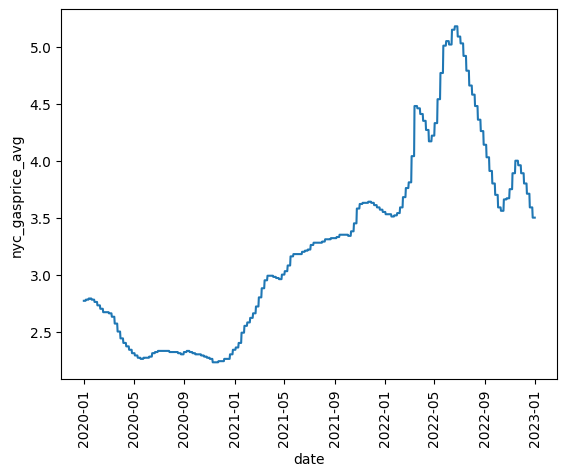

In [16]:
# plot all the variables on the same chart
sns.lineplot(x='date', y='nyc_gasprice_avg', data=df)
# display the chart
plt.xticks(rotation=90)
plt.show()

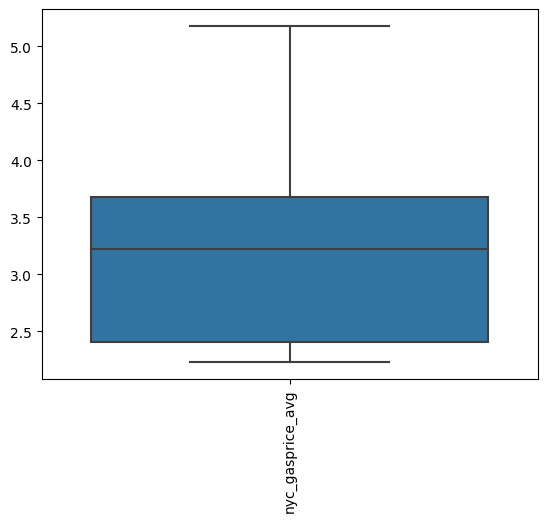

In [17]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
df

,date,nyc_gasprice_avg
0,2020-01-01,2.77
1,2020-01-02,2.77
2,2020-01-03,2.77
3,2020-01-04,2.77
4,2020-01-05,2.77
...,...,...
1091,2022-12-27,3.50
1092,2022-12-28,3.50
1093,2022-12-29,3.50
1094,2022-12-30,3.50


In [19]:
356*3

1068

In [20]:
df.drop_duplicates(inplace=True)

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\12\ipykernel_20340\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [22]:
df.drop_duplicates(subset=['date'])

,date,nyc_gasprice_avg
0,2020-01-01,2.77
1,2020-01-02,2.77
2,2020-01-03,2.77
3,2020-01-04,2.77
4,2020-01-05,2.77
...,...,...
1091,2022-12-27,3.50
1092,2022-12-28,3.50
1093,2022-12-29,3.50
1094,2022-12-30,3.50


In [23]:
import os
os.chdir(r"D:\OneDrive - Indian School of Business\Desktop\data270_spring23_group2\data\final")

In [24]:
df.to_csv('cleaned_gasprice.csv', index=False)

In [17]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize scaler
scalerS = StandardScaler()
scalerM = MinMaxScaler()

# normalize the traffic columns
df['nyc_gasprice_avg_stdS'] = scalerS.fit_transform(df[['nyc_gasprice_avg']])
df['nyc_gasprice_avg_mmS'] = scalerM.fit_transform(df[['nyc_gasprice_avg']])

df

C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\ipykernel_47128\1761582641.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyc_gasprice_avg_stdS'] = scalerS.fit_transform(df[['nyc_gasprice_avg']])
C:\Users\31405.ISBDOMAIN1\AppData\Local\Temp\ipykernel_47128\1761582641.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nyc_gasprice_avg_mmS'] = scalerM.fit_transform(df[['nyc_gasprice_avg']])


,date,nyc_gasprice_avg,nyc_gasprice_avg_stdS,nyc_gasprice_avg_mmS
0,2020-01-01,2.77,-0.620053,0.183051
1,2020-01-02,2.77,-0.620053,0.183051
2,2020-01-03,2.77,-0.620053,0.183051
3,2020-01-04,2.77,-0.620053,0.183051
4,2020-01-05,2.77,-0.620053,0.183051
...,...,...,...,...
1177,2023-03-23,3.49,0.293949,0.427119
1178,2023-03-24,3.49,0.293949,0.427119
1179,2023-03-25,3.49,0.293949,0.427119
1180,2023-03-26,3.49,0.293949,0.427119


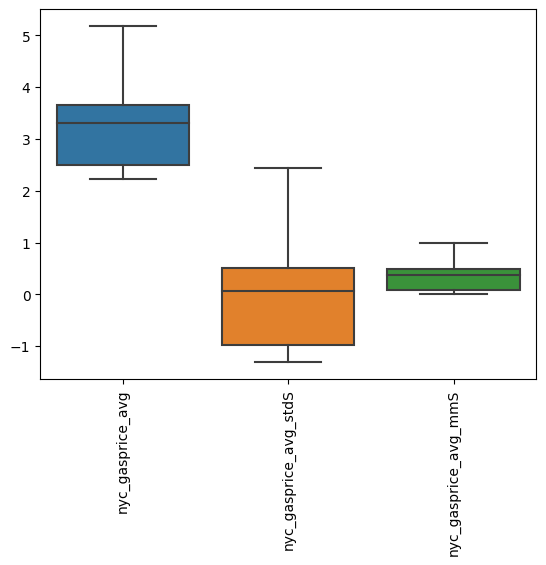

In [18]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

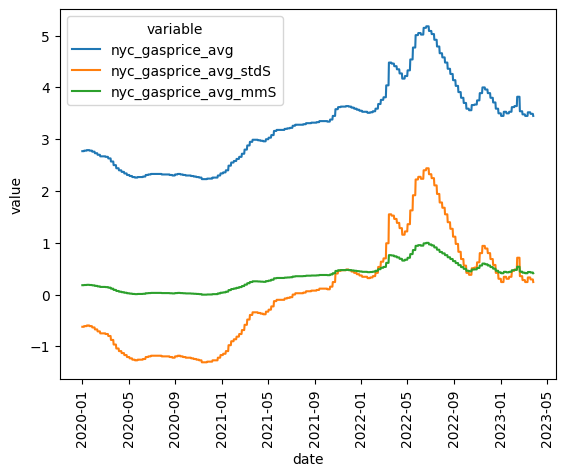

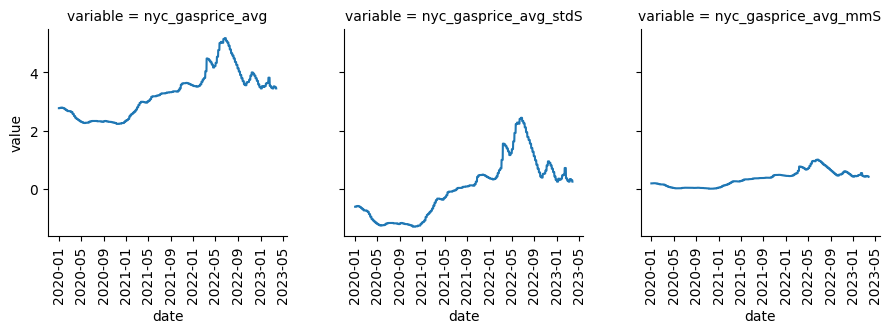

In [19]:
# convert dataframe from wide format to long format
df_melt = pd.melt(df, id_vars=['date'], var_name='variable', value_name='value')

# plot all the variables on the same chart
sns.lineplot(x='date', y='value', hue='variable', data=df_melt)
# display the chart
plt.xticks(rotation=90)
plt.show()

g = sns.FacetGrid(data=df_melt, col="variable", col_wrap=6)
g.map(sns.lineplot, "date", "value")
g.set_xticklabels(rotation=90)
plt.show()

In [20]:
df.to_csv('../data/clean_gas_scaled.csv', index=False)